# BAN427- INSURANCE ANALYTICS -TOPIC: RENEWAL OF INSURANCE POLICIES


# LOAD THE DATASET AND REMOVE MISSING VALUES 

In [1]:
import pandas as pd

# file path 
file_path = r"G:\My Drive\A-NORWAY 2022\NHH COURSE\COURSE\BAN427 INSURANCE ANALYTICS\exam2023.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# print the dataset
print(df)

       NO_OF_PAYMENTS_PER_YEAR  TENURE   AGE  NO_OF_COVERS  RENEW_NEXT_YEAR  \
0                         12.0     4.6  51.8             2              1.0   
1                         12.0     5.6  52.8             2              NaN   
2                         12.0     3.6  50.8             2              1.0   
3                         12.0     2.6  49.8             2              1.0   
4                          NaN     3.9  59.7             4              1.0   
...                        ...     ...   ...           ...              ...   
74195                      2.0     6.3  54.2             3              1.0   
74196                      2.0     4.3  52.2             4              1.0   
74197                     12.0     4.0  47.8            15              1.0   
74198                     12.0     3.0  46.8            14              1.0   
74199                     12.0     5.0  48.8            14              0.0   

       RENEW_NEXT_MONTH  WOMAN  NO_OF_TRAVEL_INSURA

# TOTAL NUMER OF VARIABLES 

In [2]:
# find out the total number of variables 
total_variables = len(df.columns)
print("Total number of variables in the dataset:", total_variables)


Total number of variables in the dataset: 38


# REMOVE IRELEVANT COLUMN

In [3]:
import pandas as pd

# delte the column
df_column = df.drop(columns=['Hashed_ID'])

print(df_column)

       NO_OF_PAYMENTS_PER_YEAR  TENURE   AGE  NO_OF_COVERS  RENEW_NEXT_YEAR  \
0                         12.0     4.6  51.8             2              1.0   
1                         12.0     5.6  52.8             2              NaN   
2                         12.0     3.6  50.8             2              1.0   
3                         12.0     2.6  49.8             2              1.0   
4                          NaN     3.9  59.7             4              1.0   
...                        ...     ...   ...           ...              ...   
74195                      2.0     6.3  54.2             3              1.0   
74196                      2.0     4.3  52.2             4              1.0   
74197                     12.0     4.0  47.8            15              1.0   
74198                     12.0     3.0  46.8            14              1.0   
74199                     12.0     5.0  48.8            14              0.0   

       RENEW_NEXT_MONTH  WOMAN  NO_OF_TRAVEL_INSURA

# DELETE MISSING VALUES 

In [4]:
import pandas as pd


# Remove rows with missing values
df_cleaned = df_column.dropna()

# print the dataset
print(df_cleaned)


       NO_OF_PAYMENTS_PER_YEAR  TENURE   AGE  NO_OF_COVERS  RENEW_NEXT_YEAR  \
0                         12.0     4.6  51.8             2              1.0   
2                         12.0     3.6  50.8             2              1.0   
3                         12.0     2.6  49.8             2              1.0   
9                          4.0    11.7  64.4             3              1.0   
10                         4.0    12.7  65.4             3              1.0   
...                        ...     ...   ...           ...              ...   
74195                      2.0     6.3  54.2             3              1.0   
74196                      2.0     4.3  52.2             4              1.0   
74197                     12.0     4.0  47.8            15              1.0   
74198                     12.0     3.0  46.8            14              1.0   
74199                     12.0     5.0  48.8            14              0.0   

       RENEW_NEXT_MONTH  WOMAN  NO_OF_TRAVEL_INSURA

# FINAL DATASET AND TOTAL VARIABLES 

In [5]:
# find out the total observation and variables 
total_observations = df_cleaned.shape[0]
total_variables = df_cleaned.shape[1]

print("Total Observations:", total_observations)
print("Total Variables:", total_variables)



Total Observations: 51945
Total Variables: 37


# MOST VALUES ARE BINARY 

In [6]:
import pandas as pd

binary_variables = []

for column in df_cleaned.columns:
    unique_values = df_cleaned[column].unique()
    if len(unique_values) == 2 and set(unique_values) == {0, 1}:
        binary_variables.append(column)

print("Binary Variables:", binary_variables)


Binary Variables: ['RENEW_NEXT_YEAR', 'RENEW_NEXT_MONTH', 'WOMAN', 'DIRECT_CUSTOMER', 'CUSTOMER_THROUGH_PARTNER1', 'CUSTOMER_THROUGH_PARTNER2', 'CUSTOMER_THROUGH_PARTNER3', 'CUSTOMER_THROUGH_PARTNER4', 'AT_LEAST_ONE_PAID_CLAIM_LAST_YEAR', 'UNPAID_CLAIM_LAST_YEAR', 'HAVE_TRAVEL_INSURANCE', 'HAVE_BOAT_INSURANCE', 'HAVE_CABIN_INSURANCE', 'HAVE_BOAT_INSURANCE.1', 'HAVE_CAR_INSURANCE', 'HAVE_CHILD_INSURANCE', 'HAVE_HOUSE_INSURANCE', 'EAST_REGION', 'SOUTH_REGION', 'WEST_REGION', 'MIDDLE_REGION', 'NORTH_REGION', 'OTHER_REGION']


 # DISTRIBUTION OF OUTCOME VARIABLE 

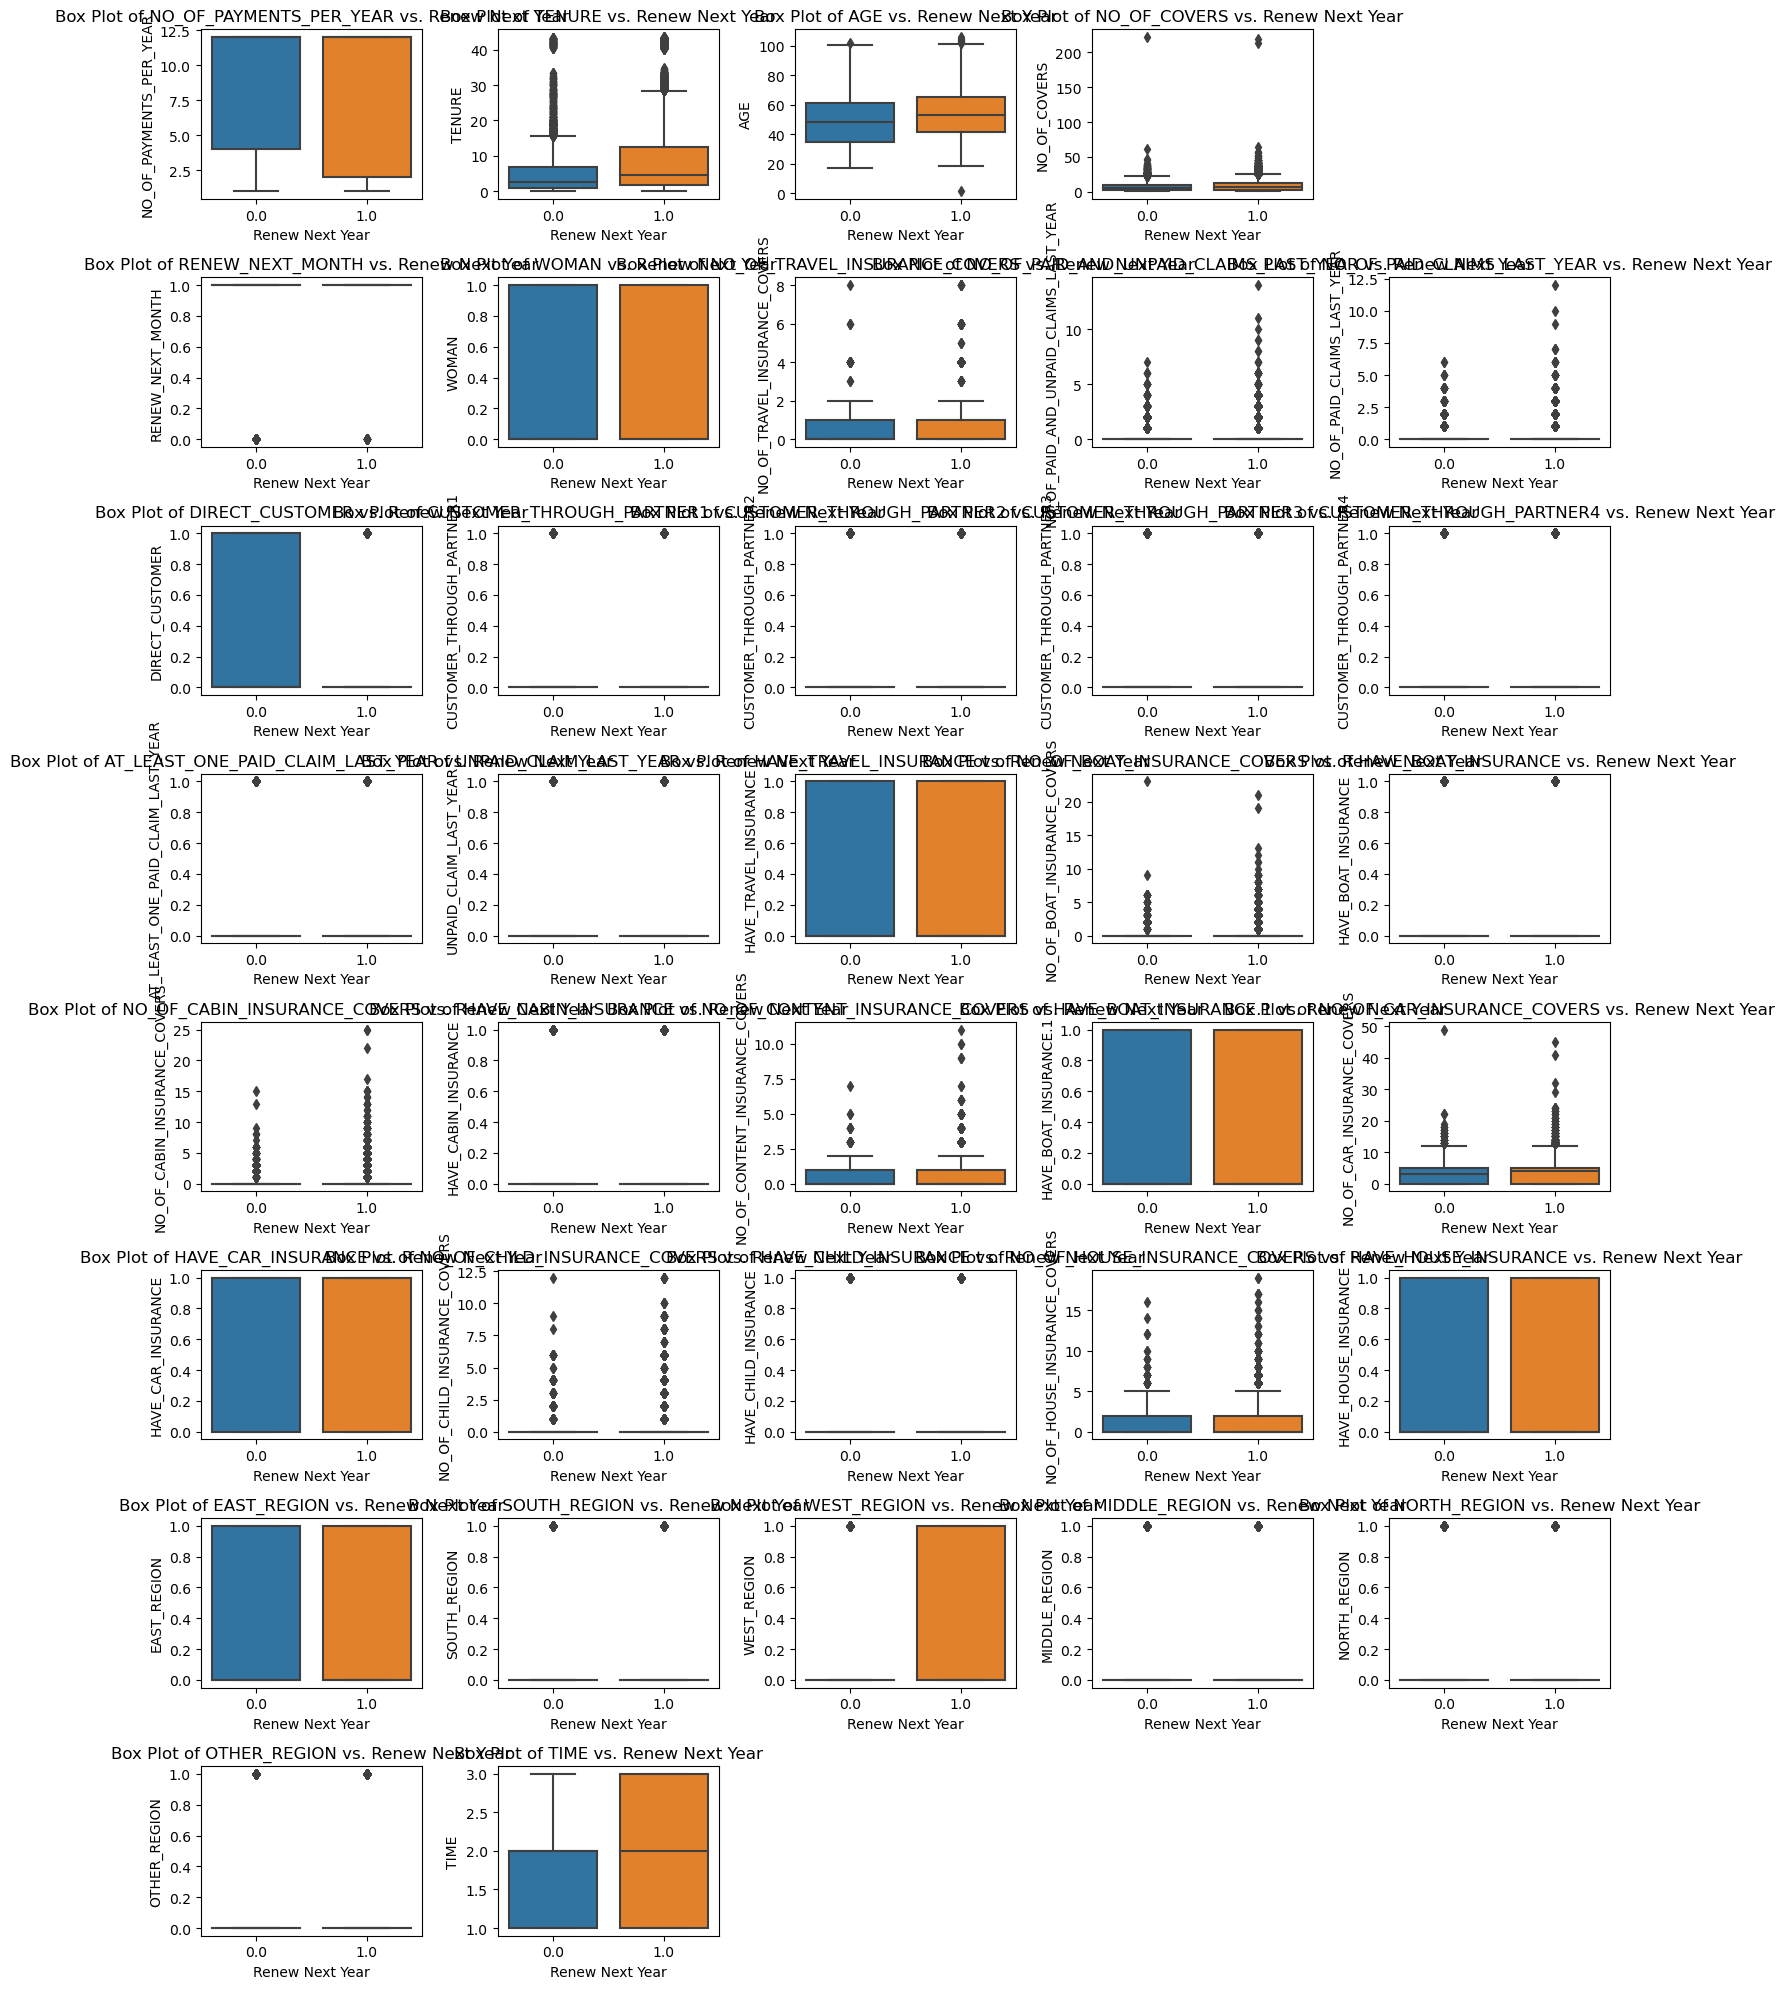

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#  df_cleaned DataFrame
plt.figure(figsize=(15, 20))
for i, col in enumerate(df_cleaned.columns):
    if col != "RENEW_NEXT_YEAR":  
        plt.subplot(8, 5, i + 1)   
        sns.boxplot(x="RENEW_NEXT_YEAR", y=col, data=df_cleaned)
        plt.title(f'Box Plot of {col} vs. Renew Next Year')
        plt.xlabel("Renew Next Year")
        plt.ylabel(col)
plt.tight_layout()
plt.show()


# CORRELATION MATRIX WITH THE OUTCOME VARIABLE 

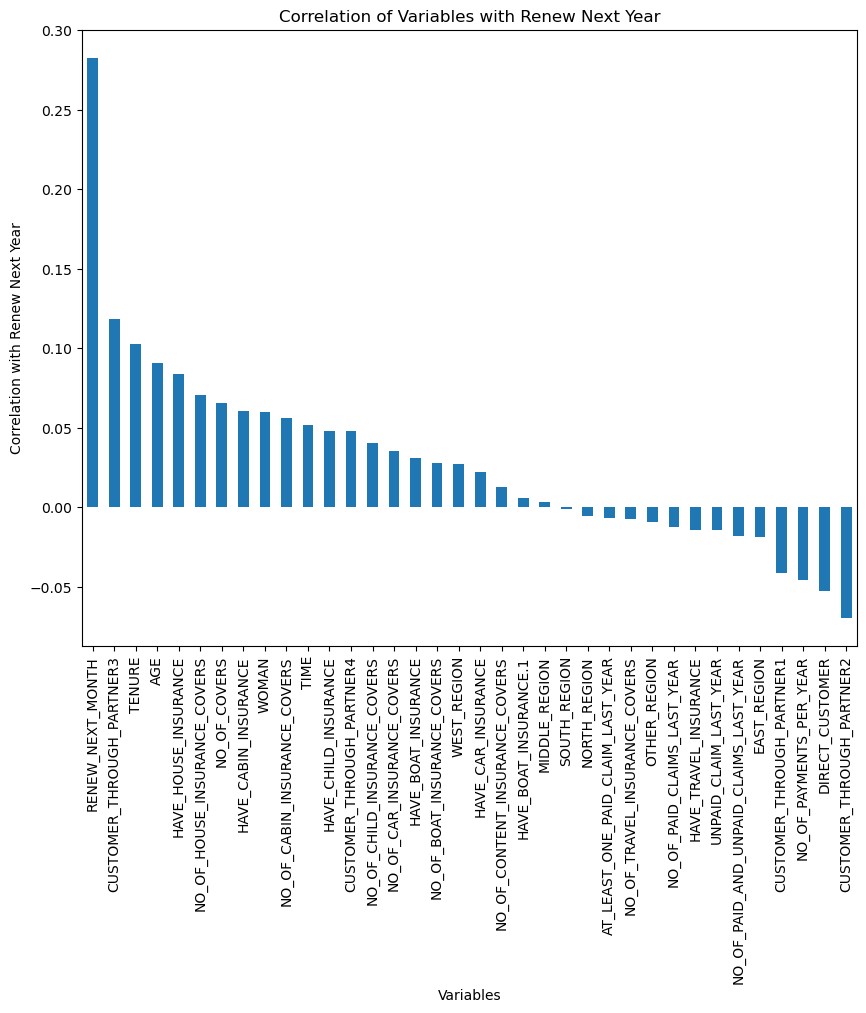

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

#  df_cleaned DataFrame
correlation_matrix = df_cleaned.corr()

# Correlation of Renew Next Year with other variables
correlation_with_renew = correlation_matrix['RENEW_NEXT_YEAR']

# Sort correlations in descending order
correlation_sorted = correlation_with_renew.sort_values(ascending=False)

# Plot the correlation values
plt.figure(figsize=(10, 8))
correlation_sorted.drop('RENEW_NEXT_YEAR').plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Correlation with Renew Next Year')
plt.title('Correlation of Variables with Renew Next Year')
plt.xticks(rotation=90)
plt.show()


# DATA REPRENTATION IN PERCENTAGE 


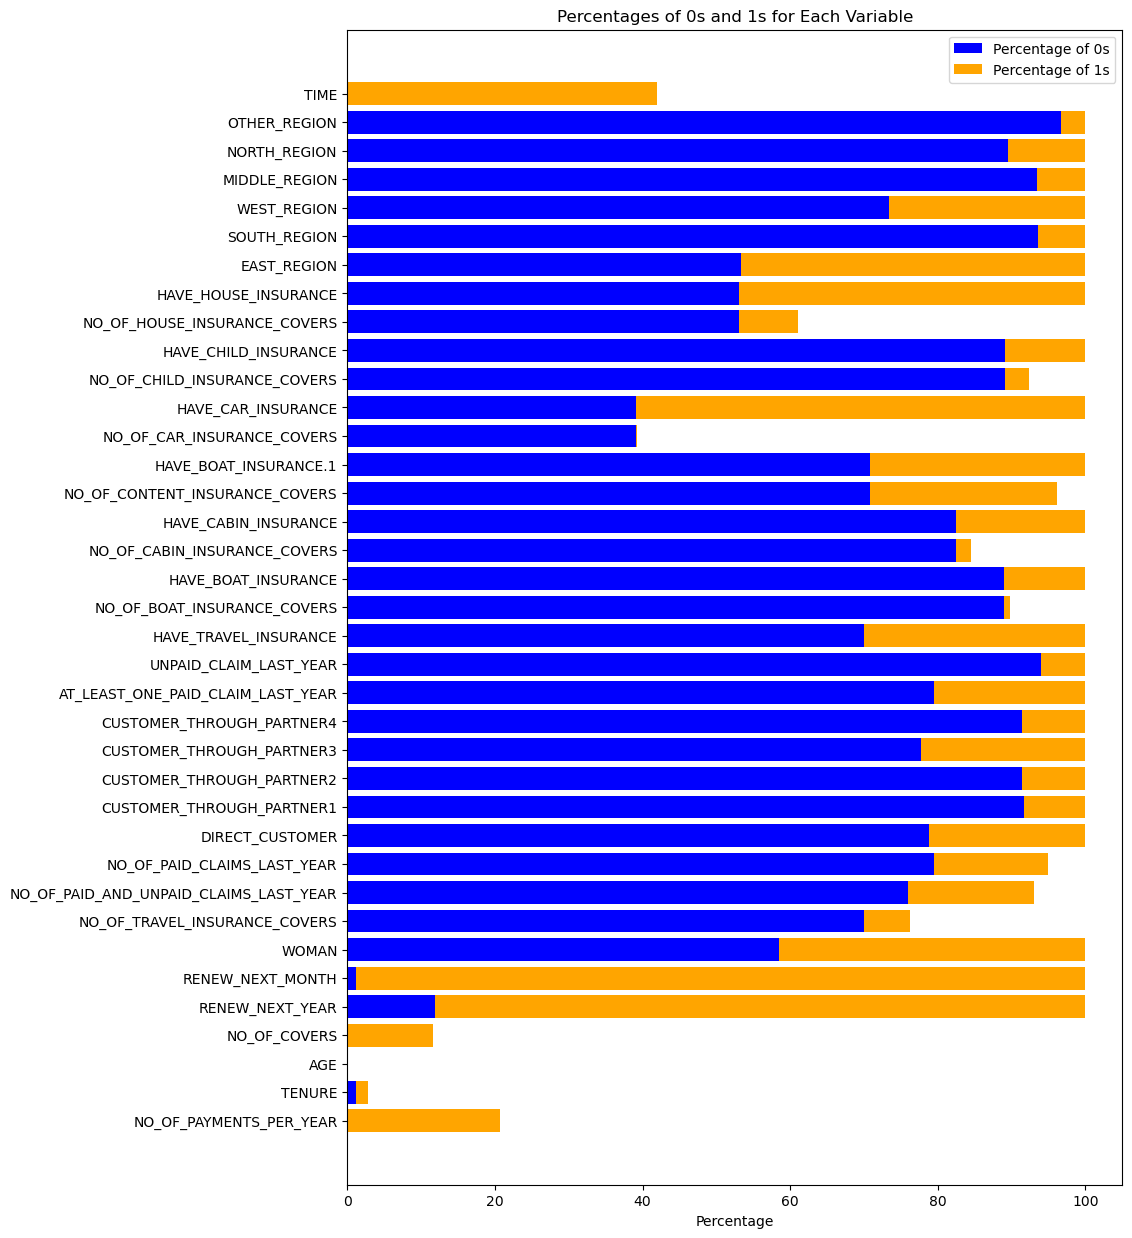

In [9]:
import matplotlib.pyplot as plt

# Create lists to store column names, percentages of 0s, and percentages of 1s
columns = []
percentage_0s = []
percentage_1s = []

# Loop through each column in the DataFrame
for col in df_cleaned.columns:
    if col != 'Hashed_ID':  # Exclude the Hashed_ID column if present
        value_counts = df_cleaned[col].value_counts()
        
        # Calculate the percentage of 0s and 1s
        if 0 in value_counts.index:
            percentage_0 = (value_counts[0] / len(df_cleaned)) * 100
        else:
            percentage_0 = 0
        
        if 1 in value_counts.index:
            percentage_1 = (value_counts[1] / len(df_cleaned)) * 100
        else:
            percentage_1 = 0
        
        columns.append(col)
        percentage_0s.append(percentage_0)
        percentage_1s.append(percentage_1)

# Create a bar chart
plt.figure(figsize=(10, 15))
plt.barh(columns, percentage_0s, color='blue', label='Percentage of 0s')
plt.barh(columns, percentage_1s, color='orange', label='Percentage of 1s', left=percentage_0s)
plt.xlabel('Percentage')
plt.title('Percentages of 0s and 1s for Each Variable')
plt.legend()
plt.show()


1. HAVE THE RENEWAL RATE DECREASED OVER TIME 

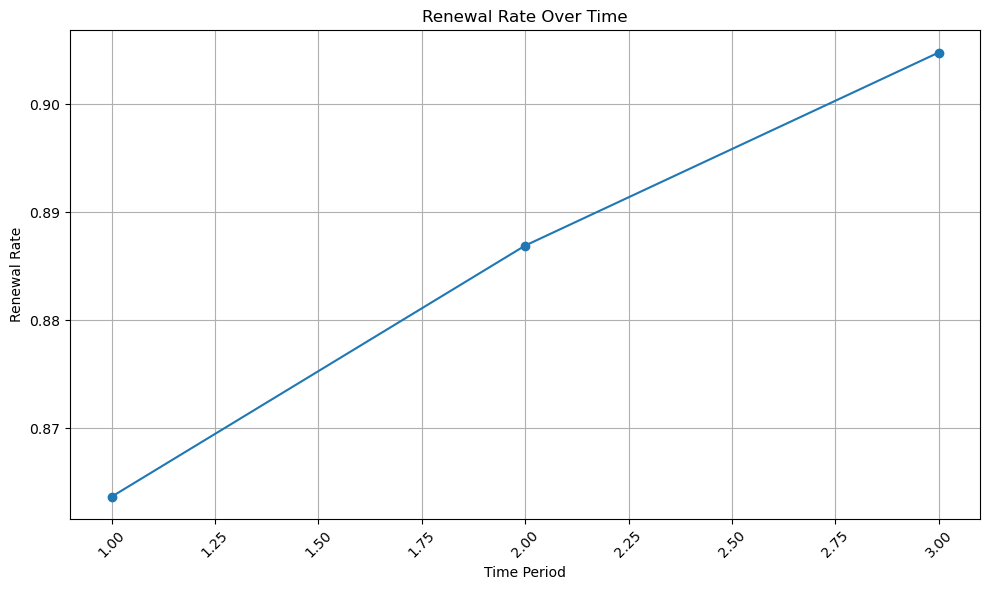

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


# Group data by time periods and calculate renewal rates
renewal_rates = df_cleaned.groupby('TIME')['RENEW_NEXT_YEAR'].mean()

# Create a line plot to visualize the trend of renewal rates over time
plt.figure(figsize=(10, 6))
plt.plot(renewal_rates.index, renewal_rates.values, marker='o')
plt.xlabel('Time Period')
plt.ylabel('Renewal Rate')
plt.title('Renewal Rate Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


QUESTION 2

# LASSO REGRESSION TO REDUCE PREDICTORS 

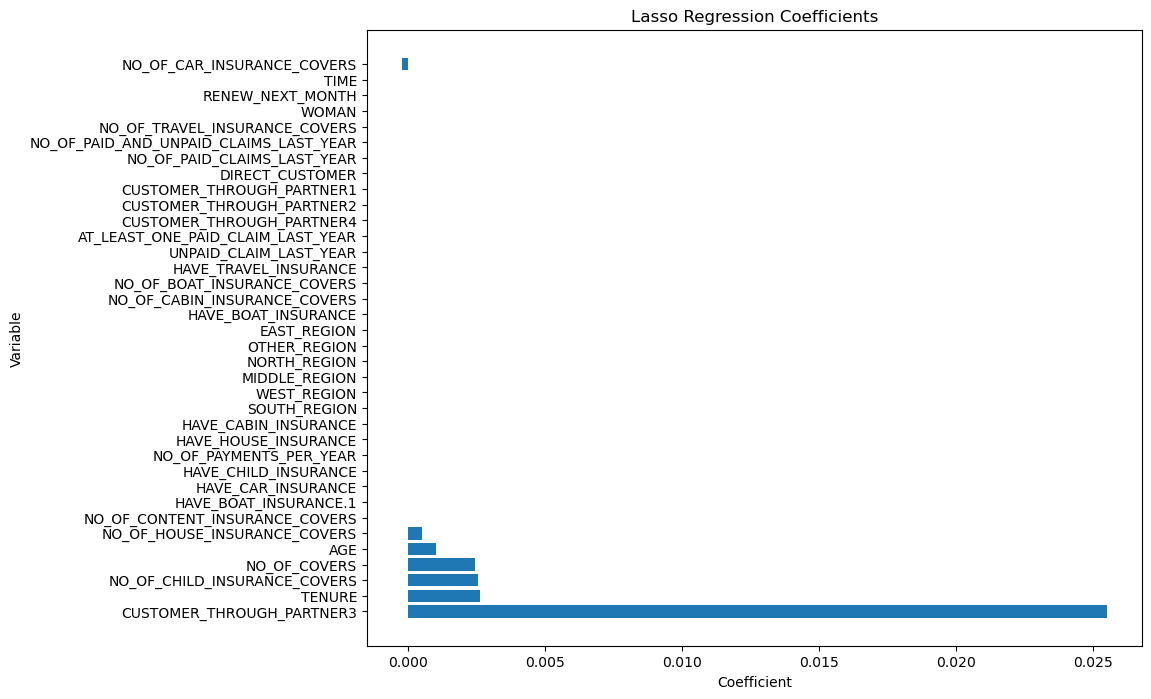

In [25]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt


# Splitting the data into predictors (X) and outcome (y)
X = df_cleaned.drop('RENEW_NEXT_YEAR', axis=1)
y = df_cleaned['RENEW_NEXT_YEAR']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit Lasso regression model
lasso_model = Lasso(alpha=0.01)  # You can adjust the regularization strength (alpha) as needed
lasso_model.fit(X_train, y_train)

# Get the coefficients from the model
coefficients = lasso_model.coef_

# Create a DataFrame to store the coefficients along with variable names
coefficients_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': coefficients})

# Sort the coefficients in descending order of magnitude
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 8))
plt.barh(coefficients_df['Variable'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.title('Lasso Regression Coefficients')
plt.show()

# MODEL BUILDING 

# PERFORM LOGISTIC REGRESSION WITH THE SELECTED PREDICTORS

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Select the predictor variables and the outcome variable
selected_predictors = ['AGE', 'NO_OF_COVERS', 'CUSTOMER_THROUGH_PARTNER3',
                       'NO_OF_CAR_INSURANCE_COVERS', 'NO_OF_CHILD_INSURANCE_COVERS',
                       'NO_OF_HOUSE_INSURANCE_COVERS', 'TENURE']
X = df_cleaned[selected_predictors]
y = df_cleaned['RENEW_NEXT_YEAR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predict the outcome on the test set
y_pred = logreg_model.predict(X_test)

# Generate a confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Not Renewed', 'Renewed'])

# Print the confusion matrix and classification report
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Calculate and print the correlation matrix
correlation_matrix = X.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Confusion Matrix:
 [[   0 1221]
 [   0 9168]]

Classification Report:
               precision    recall  f1-score   support

 Not Renewed       0.00      0.00      0.00      1221
     Renewed       0.88      1.00      0.94      9168

    accuracy                           0.88     10389
   macro avg       0.44      0.50      0.47     10389
weighted avg       0.78      0.88      0.83     10389


Correlation Matrix:
                                    AGE  NO_OF_COVERS  \
AGE                           1.000000      0.091883   
NO_OF_COVERS                  0.091883      1.000000   
CUSTOMER_THROUGH_PARTNER3     0.001909      0.087193   
NO_OF_CAR_INSURANCE_COVERS    0.008055      0.779136   
NO_OF_CHILD_INSURANCE_COVERS -0.147490      0.189341   
NO_OF_HOUSE_INSURANCE_COVERS  0.157411      0.624478   
TENURE                        0.439810     -0.012250   

                              CUSTOMER_THROUGH_PARTNER3  \
AGE                                            0.001909   
NO_OF_COVERS 

c:\Users\prba6\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\prba6\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\prba6\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# MODEL ACCURACY 

Accuracy: 0.8824718452209067


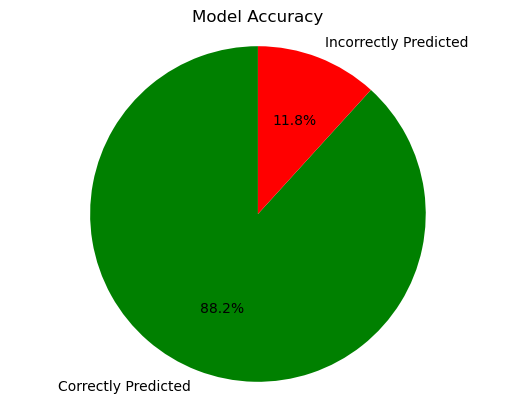

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt


# Select the predictor variables and the outcome variable
selected_predictors = ['AGE', 'NO_OF_COVERS', 'CUSTOMER_THROUGH_PARTNER3',
                       'NO_OF_CAR_INSURANCE_COVERS', 'NO_OF_CHILD_INSURANCE_COVERS',
                       'NO_OF_HOUSE_INSURANCE_COVERS','TENURE']
X = df_cleaned[selected_predictors]
y = df_cleaned['RENEW_NEXT_YEAR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predict the outcome on the test set
y_pred = logreg_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a pie chart to visualize the accuracy
labels = ['Correctly Predicted', 'Incorrectly Predicted']
sizes = [accuracy, 1 - accuracy]
colors = ['green', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Model Accuracy')
plt.show()


In [14]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8824718452209067


#  PRECISION-RECALL CURVE AND RECEIVER OPERATING CHARACTERISTIC (ROC) CURVE

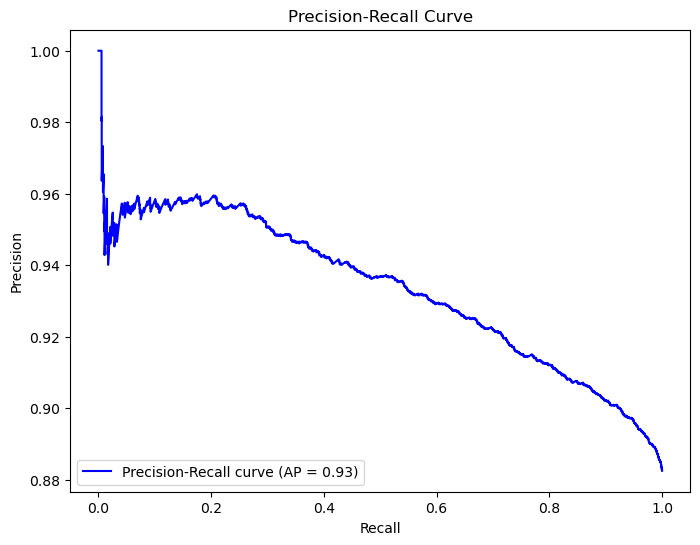

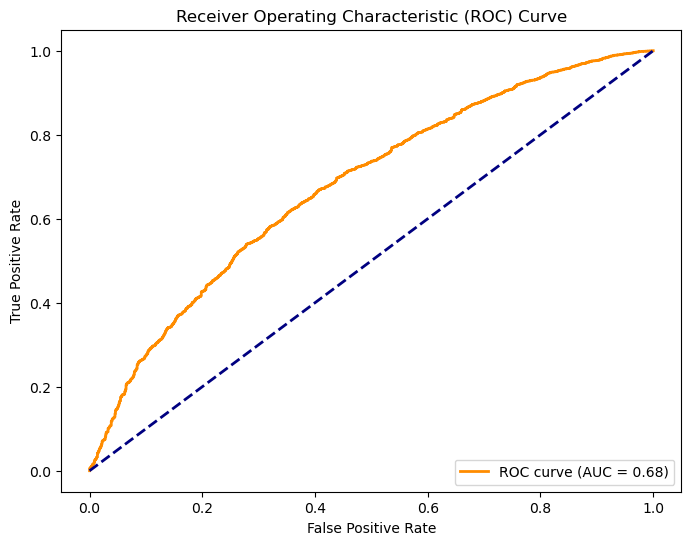

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc


# Calculate predicted probabilities for the positive class
y_scores = logreg_model.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = auc(recall, precision)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# MODEL IMPROVEMENT

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report



# Select the predictor variables and the outcome variable
selected_predictors = ['AGE', 'NO_OF_COVERS', 'CUSTOMER_THROUGH_PARTNER3',
                       'NO_OF_CAR_INSURANCE_COVERS', 'NO_OF_CHILD_INSURANCE_COVERS',
                       'NO_OF_HOUSE_INSURANCE_COVERS','TENURE']
X = df_cleaned[selected_predictors]
y = df_cleaned['RENEW_NEXT_YEAR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model with a different solver and increased max_iter
logreg_model = LogisticRegression(solver='liblinear', max_iter=1000)

# Perform grid search with cross-validation
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(logreg_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Predict the outcome on the test set
y_pred = grid_search.predict(X_test_scaled)

# Generate a confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Not Renewed', 'Renewed'])

# Print the confusion matrix and classification report
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("\nBest Parameters:", best_params)

# Calculate and print the accuracy of the model
accuracy = grid_search.score(X_test_scaled, y_test)
print("\nAccuracy:", accuracy)


Confusion Matrix:
 [[   0 1221]
 [   0 9168]]

Classification Report:
               precision    recall  f1-score   support

 Not Renewed       0.00      0.00      0.00      1221
     Renewed       0.88      1.00      0.94      9168

    accuracy                           0.88     10389
   macro avg       0.44      0.50      0.47     10389
weighted avg       0.78      0.88      0.83     10389


Best Parameters: {'C': 0.001, 'penalty': 'l1'}

Accuracy: 0.8824718452209067


c:\Users\prba6\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\prba6\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\prba6\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


QUESTION 3

In [18]:
import pandas as pd
from scipy.stats import chi2_contingency


# Create a contingency table of RENEW_NEXT_YEAR and TIME
contingency_table = pd.crosstab(df_cleaned['RENEW_NEXT_YEAR'], df_cleaned['TIME'])

# Perform the Chi-Square Test for Homogeneity
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)

if p < 0.05:
    print("The distribution is not consistent across time periods. The pattern is not stable.")
else:
    print("The distribution is consistent across time periods. The pattern is stable.")


Chi-Square Statistic: 138.92563844904532
P-value: 6.802693646921731e-31
The distribution is not consistent across time periods. The pattern is not stable.
